In [241]:
import pandas as pd
import numpy as np
import scikitplot
import scikitplot.plotters as skplt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [60]:
def trans(str0):
    if str0 == False:
        return 0
    else:
        return 1
df = pd.read_csv('zillow_feature.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df['owner_occupied'] = df['owner_occupied'].apply(trans)
df2 = df[['address','num_units','num_bedrooms','longitude','latitude','owner_occupied']]
cur_addr = set(df['address'])

In [30]:
# train_x2 = df2.drop('owner_occupied', axis=1).drop('address', axis=1)
# train_x2 = train_x2.apply(lambda x: (x - np.mean(x)) / (np.std(x)))

In [31]:
train_x = df.drop('owner_occupied', axis=1)
train_y = df['owner_occupied'].values
train_x = train_x.drop('address', axis=1)
#zscore 
train_x = train_x.drop('zestimate_percentile', axis=1)
train_x = train_x.apply(lambda x: (x - np.mean(x)) / (np.std(x)))
train_y

array([0, 1, 0, ..., 1, 1, 1])

In [32]:
# train_x = train_x.values
# train_x2 = train_x2.values
# from sklearn.decomposition import PCA
# pca=PCA(n_components=3)
# train_x=pca.fit_transform(train_x)

In [249]:
#train_x2 = train_x2.values
#train_x2

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_x,train_y,test_size=0.3, random_state=12)
#X_train2, X_test2, Y_train, Y_test = train_test_split(train_x2,train_y,test_size=0.3, random_state=12)

Accuracy: 0.7588267246061923


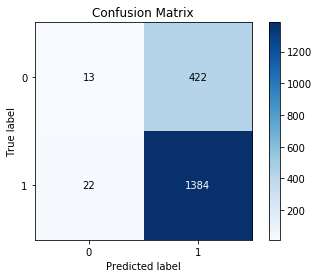

In [263]:
clf = RandomForestClassifier(n_estimators=2000,max_depth=18).fit(X_train, Y_train)
yy = clf.predict(X_test)
scikitplot.metrics.plot_confusion_matrix(Y_test, yy)
print('Accuracy: {}'.format(accuracy_score(Y_test, yy)))

In [265]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
#oversampler=SMOTE()
oversampler=RandomOverSampler()
os_x,os_y=oversampler.fit_sample(X_train,Y_train)
#clf =XGBClassifier().fit(os_x,os_y)
clf = RandomForestClassifier(n_estimators=2000,max_depth=18).fit(os_x,os_y)
#clf = LogisticRegression().fit(os_x,os_y)
#clf = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0).fit(os_x,os_y)
#clf = SVC().fit(os_x,os_y)
clf.score(X_test, Y_test)
#evaluate_features(os_x,os_y)
#evaluate_features(os_x,os_y,RandomForestClassifier(class_weight='balanced',n_estimators=2000, max_depth=16, verbose=1))

0.7251493753394894

Accuracy: 0.7251493753394894


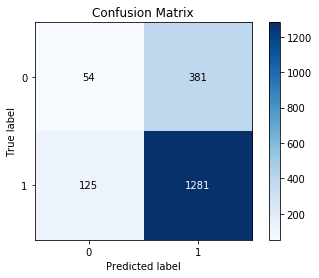

In [266]:
#clf = RandomForestClassifier(n_estimators=2000,max_depth=16).fit(X_train2, Y_train)
yy = clf.predict(X_test)
scikitplot.metrics.plot_confusion_matrix(Y_test, yy)
print('Accuracy: {}'.format(accuracy_score(Y_test, yy)))

In [ ]:
def evaluate_features(X, y, clf=None):
    if clf is None:
        clf = LogisticRegression()
    
    probas = cross_val_predict(clf, X, y, cv=StratifiedKFold(random_state=8), 
                              n_jobs=-1, method='predict_proba', verbose=2)
    pred_indices = np.argmax(probas, axis=1)
    classes = np.unique(y)
    preds = classes[pred_indices]
    print('Log loss: {}'.format(log_loss(y, probas)))
    print('Accuracy: {}'.format(accuracy_score(y, preds)))
    skplt.plot_confusion_matrix(y, preds)

# clf = RandomForestClassifier(n_estimators=2000, max_depth=20, verbose=1).fit(X_train2, Y_train)
# clf.score(X_test2, Y_test)
# evaluate_features(X_train2,Y_train,RandomForestClassifier(n_estimators=2000, max_depth=18, verbose=1))

In [ ]:
# mbu = pd.read_excel('mailing.bedroom.unit.xlsx')
# mbu.rename(columns=lambda x:x.replace(' ','_').replace('#','o'), inplace=True)
# #mbu_modify = []
# mbu_dict = {}
# for row in mbu.itertuples():
#     #mbu_modify.append([row.Mailing_Street_Address,row._of_Units,row._of_Units])
#     addr = row.Mailing_Street_Address.rstrip()
#     if addr not in mbu_dict:
#         mbu_dict[addr] = [row.o_of_Units,[row.o_of_Bedrooms]]
#     else:
#         mbu_dict[addr][0] += 1
#         mbu_dict[addr][1].append(row.o_of_Bedrooms)
# for i in mbu_dict:
#     mean = sum(mbu_dict[i][1])/len(mbu_dict[i][1])
#     mbu_dict[i][1] = mean
# import string
# loc = pd.read_excel('address with location.xlsx')
# def del_unit(s):
#     return s.rstrip(string.digits).rstrip() 
# loc['address'] = loc['address'].apply(del_unit)
# loc = loc.drop_duplicates()
# undefined = []
# for row in loc.itertuples():
#     if row.address not in cur_addr:
#         if row.address in mbu_dict:
#             undefined.append([row.address,mbu_dict[row.address][0],mbu_dict[row.address][1],row.longitude,row.latitude])
# tests = pd.DataFrame(undefined,columns=['address','num_units','num_bedrooms','longitude','latitude'])
# testx = tests.drop('address', axis=1)
# testx = testx.apply(lambda x: (x - np.mean(x)) / (np.std(x)))
# tx = testx.values
# result = clf.predict(tx)
# #result = clf.predict(tx)